## Imports

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#### Loading a Dataset

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [4]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

#### Iterating and Visualizing the Dataset

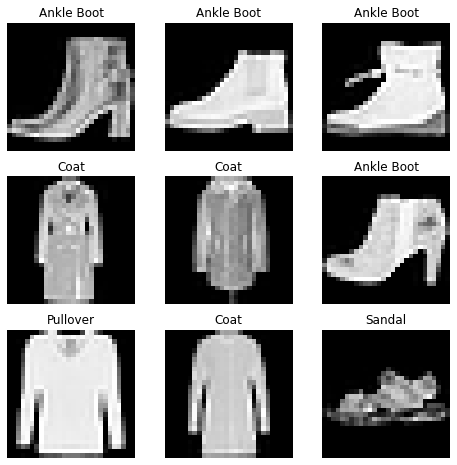

In [63]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### Creating a Custom Dataset for your files

In [64]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

#### Preparing your data for training with DataLoaders

In [65]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

#### Iterate through the DataLoader
Display image and label.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Label: Sandal


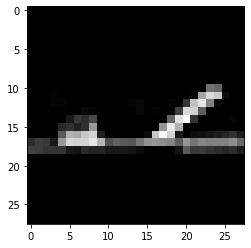

In [66]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

## Transforms

In [67]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## Build the Neural Network

In [68]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


#### Define the Class

In [69]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [70]:
X = torch.rand(1, 28, 28, device=device)
#print(X)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(pred_probab)
print(y_pred)
print(f"Predicted class: {labels_map[y_pred.item()]}")

tensor([[0.0967, 0.0967, 0.0992, 0.0967, 0.0987, 0.0972, 0.1059, 0.1157, 0.0967,
         0.0967]], device='cuda:0', grad_fn=<SoftmaxBackward>)
tensor([7], device='cuda:0')
Predicted class: Sneaker


#### Model Layers

In [71]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


nn.Flatten

In [72]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


nn.Linear

In [73]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


nn.ReLU

In [74]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-8.7251e-02,  1.0110e+00,  3.2969e-01,  7.2047e-01,  2.2346e-01,
         -1.3493e-01, -1.8603e-01, -3.8012e-01,  9.6879e-02,  4.1849e-01,
          2.6171e-01,  1.2983e-01,  9.9911e-02,  1.2719e-01, -1.3095e-01,
         -3.4531e-01,  1.0372e-02,  5.1662e-01,  1.1756e-01, -3.0582e-01],
        [ 2.2937e-02,  7.4384e-01,  1.9574e-01,  7.2250e-01, -1.2117e-01,
         -4.1359e-01, -5.7134e-01, -3.6545e-01,  8.5689e-02,  3.5142e-01,
          1.6623e-01,  9.8242e-02, -2.7251e-01,  2.6043e-01,  1.3558e-02,
         -1.6026e-01, -3.1020e-02,  2.7437e-01, -1.1603e-01, -8.6603e-02],
        [-1.2203e-01,  8.9475e-01,  1.9739e-01,  3.6213e-01, -1.2200e-01,
         -4.5740e-01, -3.0607e-01, -2.9062e-01,  3.0067e-01,  3.0310e-01,
          1.7108e-01,  3.2366e-01,  8.3100e-02,  5.0251e-01, -7.5474e-04,
         -3.6802e-02,  3.1024e-01,  4.0385e-02,  3.8113e-01, -3.3466e-01]],
       grad_fn=<AddmmBackward>)


After ReLU: tensor([[0.0000, 1.0110, 0.3297, 0.7205, 0.2235, 

nn.Sequential

In [75]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
print(logits[0])

tensor([-0.1297, -0.0111, -0.1601,  0.1679, -0.3136,  0.1684, -0.1055, -0.2862,
         0.0734,  0.2178], grad_fn=<SelectBackward>)


nn.Softmax

In [76]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(pred_probab[0])

tensor([0.0898, 0.1010, 0.0871, 0.1209, 0.0747, 0.1209, 0.0919, 0.0767, 0.1100,
        0.1270], grad_fn=<SelectBackward>)


#### Model Parameter

In [77]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0102,  0.0177,  0.0161,  ..., -0.0040,  0.0127,  0.0247],
        [ 0.0021,  0.0213,  0.0261,  ..., -0.0298,  0.0290,  0.0101]],
       device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0073, 0.0326], device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0152, -0.0025,  0.0202,  ..., -0.0405, -0.0388,  0.0084],
        [ 0.0398,  0.0212, -0.0387,  ..., -0.0388,  0.0287,  0.0081]],
       device='cuda:0

## Optimizing Model Parameters
#### Hyperparameters

In [78]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Full Implementation

In [79]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [80]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.305255  [    0/60000]
loss: 2.295466  [ 6400/60000]
loss: 2.297152  [12800/60000]
loss: 2.292117  [19200/60000]
loss: 2.288841  [25600/60000]
loss: 2.273770  [32000/60000]
loss: 2.276977  [38400/60000]
loss: 2.262480  [44800/60000]
loss: 2.273134  [51200/60000]
loss: 2.257608  [57600/60000]
Test Error: 
 Accuracy: 27.9%, Avg loss: 0.035458 

Epoch 2
-------------------------------
loss: 2.253986  [    0/60000]
loss: 2.221000  [ 6400/60000]
loss: 2.246991  [12800/60000]
loss: 2.250456  [19200/60000]
loss: 2.258977  [25600/60000]
loss: 2.217085  [32000/60000]
loss: 2.246798  [38400/60000]
loss: 2.209034  [44800/60000]
loss: 2.198867  [51200/60000]
loss: 2.231507  [57600/60000]
Test Error: 
 Accuracy: 28.6%, Avg loss: 0.034515 

Epoch 3
-------------------------------
loss: 2.204686  [    0/60000]
loss: 2.225656  [ 6400/60000]
loss: 2.182305  [12800/60000]
loss: 2.121274  [19200/60000]
loss: 2.173926  [25600/60000]
loss: 2.162281  [32000/600

#### Save and load the model
by model weights

In [82]:
torch.save(model.state_dict(), 'tutorial3_model_weights.pth')

loaded_model = NeuralNetwork().to(device)
loaded_model.load_state_dict(torch.load('tutorial3_model_weights.pth'))
loaded_model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

with Shapes

In [84]:
torch.save(model, 'tutorial3_model.pth')
loaded_model2 = torch.load('tutorial3_model.pth')
loaded_model2



NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)